In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("loan_dataset.csv")

In [3]:
data

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,4,5,6,7,8,9,10,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116053,382119962287,Y,Browning-Hart,4.125,153000,360,2012-02-01,04/2012,88,2.0,...,0,0,0,0,0,0,0,0,0,0
116054,582803915466,Z,OTHER,3.000,150000,120,2012-01-01,03/2012,35,1.0,...,0,0,0,0,0,0,0,0,0,0
116055,837922316947,X,OTHER,3.875,166000,360,2012-02-01,04/2012,58,2.0,...,0,0,0,0,0,0,0,0,0,0
116056,477343182138,X,OTHER,4.250,169000,360,2012-02-01,04/2012,74,2.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Data preprocessing

In [6]:
data.shape

(116058, 29)

In [10]:
data.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13'],
      dtype='object')

In [11]:
#Checking for null values
data.isna().sum()

loan_id                     0
source                      0
financial_institution       0
interest_rate               0
unpaid_principal_bal        0
loan_term                   0
origination_date            0
first_payment_date          0
loan_to_value               0
number_of_borrowers         0
debt_to_income_ratio        0
borrower_credit_score       0
loan_purpose                0
insurance_percent           0
co-borrower_credit_score    0
insurance_type              0
m1                          0
m2                          0
m3                          0
m4                          0
m5                          0
m6                          0
m7                          0
m8                          0
m9                          0
m10                         0
m11                         0
m12                         0
m13                         0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   loan_id                   116058 non-null  int64  
 1   source                    116058 non-null  object 
 2   financial_institution     116058 non-null  object 
 3   interest_rate             116058 non-null  float64
 4   unpaid_principal_bal      116058 non-null  int64  
 5   loan_term                 116058 non-null  int64  
 6   origination_date          116058 non-null  object 
 7   first_payment_date        116058 non-null  object 
 8   loan_to_value             116058 non-null  int64  
 9   number_of_borrowers       116058 non-null  float64
 10  debt_to_income_ratio      116058 non-null  float64
 11  borrower_credit_score     116058 non-null  float64
 12  loan_purpose              116058 non-null  object 
 13  insurance_percent         116058 non-null  f

In [13]:
#Dropping null values
data = data.dropna()

In [15]:
#Unique values of Source variable
data['source'].value_counts()

X    63858
Y    37554
Z    14646
Name: source, dtype: int64

In [16]:
#Unique values of financial_institution variable
data['financial_institution'].nunique()

19

In [11]:
data['financial_institution'].value_counts(normalize = True)*100

OTHER                          42.822554
Browning-Hart                  27.444898
Swanson, Newton and Miller      5.922901
Edwards-Hoffman                 4.184976
Martinez, Duffy and Bird        4.062624
Miller, Mcclure and Allen       2.721053
Nicholson Group                 1.823226
Turner, Baldwin and Rhodes      1.590584
Suarez Inc                      1.542332
Cole, Brooks and Vincent        1.414810
Richards-Walters                1.257130
Taylor, Hunt and Rodriguez      1.084802
Sanchez-Robinson                1.027934
Sanchez, Hays and Wilkerson     0.734977
Romero, Woods and Johnson       0.646229
Thornton-Davis                  0.560926
Anderson-Taylor                 0.416171
Richardson Ltd                  0.407555
Chapman-Mcmahon                 0.334316
Name: financial_institution, dtype: float64

In [17]:
#Checking outliers for Interest rate variable
data['interest_rate'].describe() 

count    116058.000000
mean          3.868961
std           0.461020
min           2.250000
25%           3.500000
50%           3.875000
75%           4.125000
max           6.750000
Name: interest_rate, dtype: float64

In [18]:
#Checking outliers for Unpaid Principal Balance
data['unpaid_principal_bal'].describe().round()

count     116058.0
mean      208226.0
std       114685.0
min        11000.0
25%       120000.0
50%       183000.0
75%       278000.0
max      1200000.0
Name: unpaid_principal_bal, dtype: float64

In [19]:
#Dropping extreme values
data[data['unpaid_principal_bal'] > 1000000].index

Int64Index([84135], dtype='int64')

In [20]:
data = data.drop(84135)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116057 entries, 0 to 116057
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   loan_id                   116057 non-null  int64  
 1   source                    116057 non-null  object 
 2   financial_institution     116057 non-null  object 
 3   interest_rate             116057 non-null  float64
 4   unpaid_principal_bal      116057 non-null  int64  
 5   loan_term                 116057 non-null  int64  
 6   origination_date          116057 non-null  object 
 7   first_payment_date        116057 non-null  object 
 8   loan_to_value             116057 non-null  int64  
 9   number_of_borrowers       116057 non-null  float64
 10  debt_to_income_ratio      116057 non-null  float64
 11  borrower_credit_score     116057 non-null  float64
 12  loan_purpose              116057 non-null  object 
 13  insurance_percent         116057 non-null  f

In [22]:
#Checking outliers for Loan term variable
data['loan_term'].describe()

count    116057.000000
mean        292.281965
std          89.762196
min          60.000000
25%         180.000000
50%         360.000000
75%         360.000000
max         360.000000
Name: loan_term, dtype: float64

In [24]:
#Checking outliers for Loan to Value variable
data['loan_to_value'].describe()

count    116057.000000
mean         67.432098
std          17.291709
min           6.000000
25%          57.000000
50%          72.000000
75%          80.000000
max          97.000000
Name: loan_to_value, dtype: float64

<Axes: >

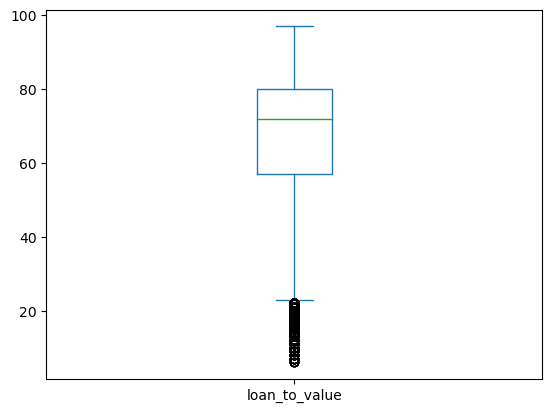

In [26]:
data['loan_to_value'].plot(kind = 'box')

In [21]:
data[data['loan_to_value'] <7]

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
3809,778482838695,X,OTHER,4.375,100000,360,2012-01-01,03/2012,6,2.0,...,0,0,0,0,0,0,0,0,0,0
49086,347923793768,X,OTHER,3.875,134000,360,2012-02-01,04/2012,6,2.0,...,0,0,0,0,0,0,0,0,0,0
81533,636086390929,X,OTHER,4.000,42000,360,2012-02-01,04/2012,6,1.0,...,0,0,0,0,0,0,0,0,0,0
103748,338955015756,Z,Browning-Hart,3.375,81000,180,2012-01-01,03/2012,6,1.0,...,0,0,0,0,0,0,0,0,0,0
109443,162915736426,Y,Browning-Hart,3.500,90000,180,2012-01-01,03/2012,6,2.0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
#Checking outliers for Debt to income ratio variable
data['debt_to_income_ratio'].describe()

count    116057.000000
mean         30.742135
std           9.730692
min           1.000000
25%          23.000000
50%          31.000000
75%          39.000000
max          64.000000
Name: debt_to_income_ratio, dtype: float64

In [29]:
#Checking outliers for Borrower credit score variable
data['borrower_credit_score'].describe()

count    116057.000000
mean        769.926545
std          42.210813
min           0.000000
25%         751.000000
50%         782.000000
75%         800.000000
max         840.000000
Name: borrower_credit_score, dtype: float64

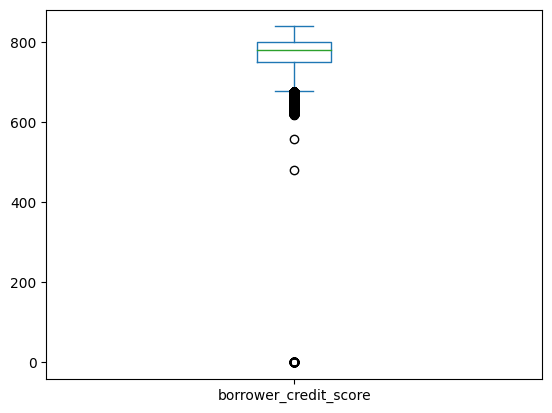

In [24]:
data['borrower_credit_score'].plot(kind = "box")
plt.show()

In [32]:
data[data['borrower_credit_score'] < 400]['m13']

683       0
4417      0
9571      0
11175     0
13977     0
16618     0
16665     0
21881     0
23969     0
25323     0
31433     0
32939     0
33284     0
34959     0
34997     0
40069     0
41022     0
42871     0
43446     0
45022     0
47002     0
47585     0
48634     0
50386     0
51403     0
51433     0
51651     0
52179     0
55253     0
56408     0
56880     0
58538     0
59662     0
61249     0
62585     0
69394     0
69602     0
77282     0
78992     0
80391     0
81283     0
85346     0
89090     0
98272     0
100083    0
103206    0
105953    0
110290    0
114572    0
114982    0
115356    0
Name: m13, dtype: int64

In [33]:
data.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13'],
      dtype='object')

In [34]:
repay_cols = ['m1','m2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12']

In [35]:
zero_credit_index = data[data['borrower_credit_score'] < 400][repay_cols].index

In [36]:
data = data.drop(zero_credit_index)

In [37]:
data.shape

(116006, 29)

In [38]:
data['loan_purpose'].value_counts(normalize = True) * 100

A23    50.391359
B12    25.328000
C86    24.280641
Name: loan_purpose, dtype: float64

In [39]:
#Checking outliers for Co-borrower credit score variable
data['co-borrower_credit_score'].describe()

count    116006.000000
mean        459.714515
std         381.931527
min           0.000000
25%           0.000000
50%         740.000000
75%         791.000000
max         836.000000
Name: co-borrower_credit_score, dtype: float64

In [40]:
data['insurance_type'].value_counts()

0.0    115628
1.0       378
Name: insurance_type, dtype: int64

In [41]:
data.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13'],
      dtype='object')

In [42]:
#Separating independent and dependant vaariables
req_cols  = [ 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term',
       'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12']


In [43]:
x = data[req_cols]

In [44]:
y = data['m13']

In [45]:
y.value_counts(normalize = 'TRUE')*100

0    99.451752
1     0.548248
Name: m13, dtype: float64

In [46]:
x.columns

Index(['source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'loan_to_value',
       'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
       'loan_purpose', 'insurance_percent', 'co-borrower_credit_score',
       'insurance_type', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9',
       'm10', 'm11', 'm12'],
      dtype='object')

In [47]:
x.shape

(116006, 25)

In [48]:
#One hot encoding for financial institutions

In [50]:
x = pd.get_dummies(x)

In [51]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116006 entries, 0 to 116057
Data columns (total 47 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   interest_rate                                      116006 non-null  float64
 1   unpaid_principal_bal                               116006 non-null  int64  
 2   loan_term                                          116006 non-null  int64  
 3   loan_to_value                                      116006 non-null  int64  
 4   number_of_borrowers                                116006 non-null  float64
 5   debt_to_income_ratio                               116006 non-null  float64
 6   borrower_credit_score                              116006 non-null  float64
 7   insurance_percent                                  116006 non-null  float64
 8   co-borrower_credit_score                           116006 non-null  float6

In [52]:
x.describe()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,...,"financial_institution_Sanchez, Hays and Wilkerson",financial_institution_Sanchez-Robinson,financial_institution_Suarez Inc,"financial_institution_Swanson, Newton and Miller","financial_institution_Taylor, Hunt and Rodriguez",financial_institution_Thornton-Davis,"financial_institution_Turner, Baldwin and Rhodes",loan_purpose_A23,loan_purpose_B12,loan_purpose_C86
count,116006.000000,116006.000000,116006.000000,116006.000000,116006.000000,116006.000000,116006.000000,116006.000000,116006.000000,116006.000000,...,116006.000000,116006.000000,116006.000000,116006.000000,116006.000000,116006.000000,116006.000000,116006.000000,116006.000000,116006.000000
mean,3.868913,208225.496957,292.271331,67.429314,1.593254,30.744539,770.265029,2.786330,459.714515,0.003258,...,0.007353,0.010284,0.015430,0.059256,0.010853,0.005612,0.015913,0.503914,0.253280,0.242806
std,0.460992,114654.925134,89.765255,17.293600,0.491229,9.729575,39.010395,8.096376,381.931527,0.056990,...,0.085435,0.100887,0.123257,0.236103,0.103611,0.074702,0.125139,0.499987,0.434892,0.428781
min,2.250000,11000.000000,60.000000,6.000000,1.000000,1.000000,480.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.500000,120000.000000,180.000000,57.000000,1.000000,23.000000,751.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.875000,183000.000000,360.000000,72.000000,2.000000,31.000000,782.000000,0.000000,740.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,4.125000,278000.000000,360.000000,80.000000,2.000000,39.000000,800.000000,0.000000,791.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,6.750000,968000.000000,360.000000,97.000000,2.000000,64.000000,840.000000,40.000000,836.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
##extra features from existing ones

In [54]:
x ['total_credit_score'] = x ['borrower_credit_score'] + x['co-borrower_credit_score']

In [55]:
x = x.drop(['borrower_credit_score','co-borrower_credit_score'],axis =1)

In [57]:
x['m_mean'] = x[repay_cols].mean(axis = 1)  ###row wise mean vaue

In [58]:
x[repay_cols].loc[3,repay_cols].kurt()

-1.6500000000000004

In [59]:
x['m_median'] = x[repay_cols].median(axis = 1)

In [60]:
x['m_std'] = x[repay_cols].std(axis =1)

In [61]:
x['m_skew'] = x[repay_cols].skew(axis =1)

In [69]:
x["m_kurt"] = x[repay_cols].kurt(axis=1)

In [70]:
#Scaling using MinMaxScaler

In [67]:
from sklearn.preprocessing import MinMaxScaler

In [71]:
y.value_counts(normalize = True)

0    0.994518
1    0.005482
Name: m13, dtype: float64

In [72]:
y.value_counts()

0    115370
1       636
Name: m13, dtype: int64

In [73]:
#Splitting Training and testing data
from sklearn.model_selection import train_test_split

In [74]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 234,stratify =y)

In [75]:
sc = MinMaxScaler()

In [76]:
x_train = sc.fit_transform(x_train)

In [77]:
x_test = sc.fit_transform(x_test)

In [78]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression

In [79]:
lg = LogisticRegression(max_iter=5000)

In [80]:
lg.fit(x_train,y_train)

LogisticRegression(max_iter=5000)

In [82]:
y_pred = lg.predict(x_test)

In [83]:
from sklearn.metrics import f1_score,confusion_matrix, recall_score

In [84]:
f1_score(y_test, y_pred)

0.2666666666666666

In [85]:
pd.Series(y_test).value_counts()

0    23075
1      127
Name: m13, dtype: int64

In [86]:
confusion_matrix(y_test, y_pred)

array([[23072,     3],
       [  107,    20]], dtype=int64)

In [87]:
recall_score(y_test, y_pred)

0.15748031496062992

In [88]:
#KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 13)

In [89]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [92]:
y_pred = knn.predict(x_test)

In [93]:
f1_score (y_test,y_pred)

0.07518796992481203

In [94]:
confusion_matrix(y_test,y_pred)

array([[23074,     1],
       [  122,     5]], dtype=int64)

In [95]:
recall_score(y_test,y_pred)

0.03937007874015748

In [96]:
#Decision tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [97]:
dt = DecisionTreeClassifier(max_depth= 8)

In [98]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8)

In [99]:
y_pred = dt.predict(x_test)

In [100]:
f1_score(y_test, y_pred)

0.27530364372469635

In [102]:
#Voting Classifier

In [103]:
from sklearn.ensemble import VotingClassifier

In [104]:
vc = VotingClassifier(estimators = [('LogisticRegression',lg),('KNeighborsClassifier',knn),('DecisionTreeClassifier',dt)], voting = 'hard')

In [105]:
#fitting train data
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('LogisticRegression',
                              LogisticRegression(max_iter=5000)),
                             ('KNeighborsClassifier',
                              KNeighborsClassifier(n_neighbors=13)),
                             ('DecisionTreeClassifier',
                              DecisionTreeClassifier(max_depth=8))])

In [106]:
#prediction using test data
y_pred = vc.predict(x_test)

In [107]:
#Evaluation Metrics

In [108]:
confusion_matrix(y_test,y_pred)

array([[23072,     3],
       [  108,    19]], dtype=int64)

In [110]:
recall_score(y_test,y_pred)

0.14960629921259844

In [111]:
f1_score(y_test,y_pred)

0.2550335570469799

In [112]:
#Bagging Classifer

In [115]:
from sklearn.ensemble import BaggingClassifier

In [116]:
dtree = DecisionTreeClassifier()

In [117]:
bg = BaggingClassifier(estimator = dtree , n_estimators = 50)

In [118]:
bg.fit(x_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50)

In [119]:
y_pred = bg.predict(x_test)

In [120]:
#Evaluation Metrics
confusion_matrix(y_test,y_pred)

array([[23035,    40],
       [   88,    39]], dtype=int64)

In [121]:
recall_score(y_test,y_pred)

0.30708661417322836

In [122]:
f1_score(y_test,y_pred)

0.37864077669902907

In [123]:
#Random Forest Classifier

In [124]:
from sklearn.ensemble import RandomForestClassifier

In [125]:
rf = RandomForestClassifier(n_estimators =150, max_depth = 8,max_features= 0.8)

In [126]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, max_features=0.8, n_estimators=150)

In [128]:
y_pred = rf.predict(x_test)

In [129]:
#Evaluation Metrics

In [130]:
confusion_matrix(y_test,y_pred)

array([[23055,    20],
       [   90,    37]], dtype=int64)

In [131]:
recall_score(y_test,y_pred)

0.29133858267716534

In [132]:
f1_score(y_test,y_pred)

0.40217391304347827